In [1]:
import pandas as pd
import scanpy as sc
import numpy as np

In [2]:
datasets = ['Pancreas_with_cc', 'DentateGyrus', 'MouseErythroid', 'MouseBoneMarrow', 'HumanBoneMarrow']
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/'

In [3]:
comparison = ['scvelo1', 'veloVI1', 'cell2fate2', 'veloVAE1']
tab_summary = pd.DataFrame(columns = datasets, index = comparison)

In [4]:
for dataset in datasets:
    print(dataset)
    tab = pd.read_csv(save_dir + dataset + '_scores.csv', index_col = 0)
    tab_summary.loc[:,dataset] = tab.loc[comparison, 'Mean']

Pancreas_with_cc
DentateGyrus
MouseErythroid
MouseBoneMarrow
HumanBoneMarrow


In [5]:
tab_summary

,Pancreas_with_cc,DentateGyrus,MouseErythroid,MouseBoneMarrow,HumanBoneMarrow
scvelo1,0.501289,0.363515,-0.480705,0.019869,-0.839002
veloVI1,0.598799,0.521108,0.066295,0.690902,-0.085064
cell2fate2,0.482475,0.223030,0.626937,-0.663160,0.302205
veloVAE1,0.562780,0.312375,0.160856,0.618357,-0.817809


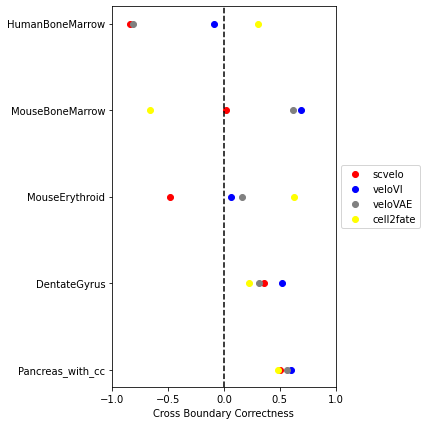

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(4,7))
ax.axvline(ymin = 0, ymax = len(tab_summary.columns), color = 'black', linestyle = '--')
ax.scatter(np.array(tab_summary.loc['scvelo1',:]), list(range(len(tab_summary.columns))), label = 'scvelo', color = 'red')
ax.scatter(np.array(tab_summary.loc['veloVI1',:]), list(range(len(tab_summary.columns))), label = 'veloVI', color = 'blue')
ax.scatter(np.array(tab_summary.loc['veloVAE1',:]), list(range(len(tab_summary.columns))), label = 'veloVAE', color = 'grey')
ax.scatter(np.array(tab_summary.loc['cell2fate2',:]), list(range(len(tab_summary.columns))), label = 'cell2fate', color = 'yellow')
ax.set_xlabel('Cross Boundary Correctness')
ax.set_yticks(list(range(len(tab_summary.columns))))
ax.set_yticklabels(datasets)
ax.set_xlim(-1,1)
ax.legend(frameon=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))